<a href="https://colab.research.google.com/github/2403a52256-code/nlp/blob/main/2403A52256_NLP_assign_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas

In [ ]:
import pandas as pd

Load text data

In [ ]:
d = pd.read_excel('/content/LDA-Data.xlsx')

displaying head

In [ ]:
display(d.head())

,News
0,Virat scored century in match
1,BJP won in elections
2,Bumra took 5 wicket in a match
3,Congress form state government


Text Preprocesing: Clean Text, Word Tokenization, stopword removal, lemma,Rejoin

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def nltk_preprocessing_pipeline(text):
  lemmatizer = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = text.lower()
  emoji_pattern = re.compile(
          "["
          "\U0001F600-\U0001F64F"
          "\U0001F300-\U0001F5FF"
          "\U0001F680-\U0001F6FF"
          "\U0001F1E0-\U0001F1FF"
          "\U00002702-\U000027B0"
          "\U000024C2-\U0001F251"
          "]+", flags=re.UNICODE
      )
  text = emoji_pattern.sub(r'', text)

  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  tokenized_words = word_tokenize(text)


  filtered_words = [word for word in tokenized_words if word not in stop_words]


  lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]


  clean_summary = ' '.join(lemmatized_words)

  return clean_summary

print("NLTK preprocessing pipeline function created successfully!")

NLTK preprocessing pipeline function created successfully!


In [ ]:
import nltk
nltk.download('punkt_tab')
d['clean_News'] = d['News'].apply(nltk_preprocessing_pipeline)
print("\nComparison of previous clean_summaries and new clean_summaries_pipeline (first 5 rows):")
print(d[['clean_News']].head())


Comparison of previous clean_summaries and new clean_summaries_pipeline (first 5 rows):
                       clean_News
0      virat scored century match
1                    bjp election
2       bumra took 5 wicket match
3  congress form state government


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')
doc_term_matrix = count_vectorizer.fit_transform(d['clean_News'])

In [ ]:
import pandas as pd
feature_names = count_vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(doc_term_matrix.toarray(),columns=feature_names)
bow_top_10 = bow_df.head(10)
print(bow_top_10)

   bjp  bumra  century  congress  election  form  government  match  scored  \
0    0      0        1         0         0     0           0      1       1   
1    1      0        0         0         1     0           0      0       0   
2    0      1        0         0         0     0           0      1       0   
3    0      0        0         1         0     1           1      0       0   

   state  took  virat  wicket  
0      0     0      1       0  
1      0     0      0       0  
2      0     1      0       1  
3      1     0      0       0  


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


num_topics = 2
LDA = LatentDirichletAllocation(n_components=num_topics, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=2, random_state=42)

In [ ]:
from sklearn.decomposition import NMF


num_topics = 2
NMF = NMF(n_components=num_topics, random_state=42)
NMF.fit(doc_term_matrix)

NMF(n_components=2, random_state=42)

In [ ]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx in range(len(model.components_)):
        print(f"\nTopic {topic_idx}:")


        topic_weights = model.components_[topic_idx]


        sorted_indices = topic_weights.argsort()[::-1]


        top_indices = sorted_indices[:num_top_words]

        for idx in top_indices:
            print(feature_names[idx], end=" ")
        print()

In [ ]:
num_top_words = 10
print(f"\nTop {num_top_words} words per topic:")
display_topics(LDA, count_vectorizer.get_feature_names_out(), num_top_words)


Top 10 words per topic:

Topic 0:
form government congress state election bjp match wicket bumra took 

Topic 1:
match virat century scored took bumra wicket bjp election state 


In [ ]:
num_top_words = 10
print(f"\nTop {num_top_words} words per topic (NMF for arxiv_data.csv - Bag of Words):")
display_topics(nmf_model, count_vectorizer_nmf.get_feature_names_out(), num_top_words)


Top 10 words per topic (NMF for arxiv_data.csv - Bag of Words):

Topic 0:
learning reinforcement deep representation transfer using image model graph data 

Topic 1:
network neural image graph using detection adversarial convolutional segmentation generative 


----------------------------------------------------------------------------------

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


num_topics = 2

LDA_arxiv = LatentDirichletAllocation(n_components=num_topics, random_state=42)
LDA_arxiv.fit(doc_term_matrix_nmf)

document_topics_lda_arxiv = LDA_arxiv.transform(doc_term_matrix_nmf)
d['topic_lda'] = document_topics_lda_arxiv.argmax(axis=1)

print("\nDataFrame with assigned LDA topics (first 5 rows) for arxiv_data.csv:")
print(d[['clean_titles', 'topic_lda']].head())


DataFrame with assigned LDA topics (first 5 rows) for arxiv_data.csv:
                                        clean_titles  topic_lda
0  survey semantic stereo matching semantic depth...          1
1  futureai guiding principle consensus recommend...          0
2  enforcing mutual consistency hard region semis...          1
3  parameter decoupling strategy semisupervised 3...          1
4  backgroundforeground segmentation interior sen...          1


LDA with kaggle Data and BoW

In [ ]:
import pandas as pd

In [ ]:
d = pd.read_csv('/content/arxiv_data.csv')

In [ ]:
display(d.head())

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
import nltk
import spacy
import re
from sklearn.decomposition import NMF
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def nltk_preprocessing_pipeline(text):
  lemmatizer = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = text.lower()
  emoji_pattern = re.compile(
          "["
          "\U0001F600-\U0001F64F"
          "\U0001F300-\U0001F5FF"
          "\U0001F680-\U0001F6FF"
          "\U0001F1E0-\U0001F1FF"
          "\U00002702-\U000027B0"
          "\U000024C2-\U0001F251"
          "]+", flags=re.UNICODE
      )
  text = emoji_pattern.sub(r'', text)

  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  tokenized_words = word_tokenize(text)


  filtered_words = [word for word in tokenized_words if word not in stop_words]


  lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]


  clean_summary = ' '.join(lemmatized_words)

  return clean_summary

print("NLTK preprocessing pipeline function created successfully!")

NLTK preprocessing pipeline function created successfully!


NMF with Sample Data and BoW

In [ ]:
# 1. Clean the 'titles' column from the arxiv_data.csv DataFrame
d['clean_titles'] = d['titles'].apply(nltk_preprocessing_pipeline)

# 2. Re-create CountVectorizer and doc_term_matrix for the cleaned titles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer_nmf = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')
doc_term_matrix_nmf = count_vectorizer_nmf.fit_transform(d['clean_titles'])

# 3. Instantiate and fit an NMF model
from sklearn.decomposition import NMF
num_topics_nmf = 2 # Assuming 2 topics, similar to the LDA example
nmf_model = NMF(n_components=num_topics_nmf, random_state=42)
document_topics_nmf = nmf_model.fit_transform(doc_term_matrix_nmf)

# 4. Assign topics to the DataFrame
d['topic_nmf'] = document_topics_nmf.argmax(axis=1)

print("\nDataFrame with assigned topics (first 5 rows):")
print(d[['clean_titles', 'topic_nmf']].head())


DataFrame with assigned topics (first 5 rows):
                                        clean_titles  topic_nmf
0  survey semantic stereo matching semantic depth...          1
1  futureai guiding principle consensus recommend...          1
2  enforcing mutual consistency hard region semis...          1
3  parameter decoupling strategy semisupervised 3...          1
4  backgroundforeground segmentation interior sen...          1


In [ ]:
from sklearn.decomposition import NMF

num_topics_nmf = 2 # Reusing the num_topics for NMF
nmf_model = NMF(n_components=num_topics_nmf, random_state=42)
nmf_model.fit(doc_term_matrix_nmf)

print(f"\nTop {num_topics_nmf} words per topic for NMF:")
display_topics(nmf_model, count_vectorizer_nmf.get_feature_names_out(), num_topics_nmf)


Top 2 words per topic for NMF:

Topic 0:
learning reinforcement 

Topic 1:
network neural 


 NMF with Kaggle Data and BoW



In [ ]:
document_topics_nmf = nmf_model.fit_transform(doc_term_matrix_nmf)
d['topic_nmf'] = document_topics_nmf.argmax(axis=1)
d['topics'] = document_topics_nmf.argmax(axis=1)
d['clean_titles'] = d['titles'].apply(nltk_preprocessing_pipeline)
print("\nDataFrame with assigned topics (first 5 rows):")
print(d[['clean_titles', 'topic_nmf']])



DataFrame with assigned topics (first 5 rows):
                                            clean_titles  topic_nmf
0      survey semantic stereo matching semantic depth...          1
1      futureai guiding principle consensus recommend...          1
2      enforcing mutual consistency hard region semis...          1
3      parameter decoupling strategy semisupervised 3...          1
4      backgroundforeground segmentation interior sen...          1
...                                                  ...        ...
51769  hierarchicallycoupled hidden markov model lear...          0
51770                         blinking molecule tracking          1
51771  towards mathematical foundation immunology ami...          0
51772  semiautomatic graphbased approach determining ...          0
51773  sparsecodepicking feature extraction mass spec...          1

[51774 rows x 2 columns]


In [ ]:
print(d.head())

                                              titles  \
0  Survey on Semantic Stereo Matching / Semantic ...   
1  FUTURE-AI: Guiding Principles and Consensus Re...   
2  Enforcing Mutual Consistency of Hard Regions f...   
3  Parameter Decoupling Strategy for Semi-supervi...   
4  Background-Foreground Segmentation for Interio...   

                                           summaries  \
0  Stereo matching is one of the widely used tech...   
1  The recent advancements in artificial intellig...   
2  In this paper, we proposed a novel mutual cons...   
3  Consistency training has proven to be an advan...   
4  To ensure safety in automated driving, the cor...   

                         terms  \
0           ['cs.CV', 'cs.LG']   
1  ['cs.CV', 'cs.AI', 'cs.LG']   
2           ['cs.CV', 'cs.AI']   
3                    ['cs.CV']   
4           ['cs.CV', 'cs.LG']   

                                        clean_titles  topic_nmf  topics  
0  survey semantic stereo matching semantic dep

In [ ]:
print(f"\nTop {num_topics_nmf} words per topic for NMF:")
display_topics(nmf_model, count_vectorizer_nmf.get_feature_names_out(), num_topics_nmf)

topic_counts = d['topic_nmf'].value_counts()
print("\nDistribution of documents across NMF topics:")
print(topic_counts)


Top 2 words per topic for NMF:

Topic 0:
learning reinforcement 

Topic 1:
network neural 

Distribution of documents across NMF topics:
topic_nmf
1    33385
0    18389
Name: count, dtype: int64


**Reasoning**:
Now that the topic counts have been calculated, I will create a bar plot to visualize the distribution of documents across the NMF topics as specified in the instructions. This will provide a clear visual representation of how many documents belong to each topic.



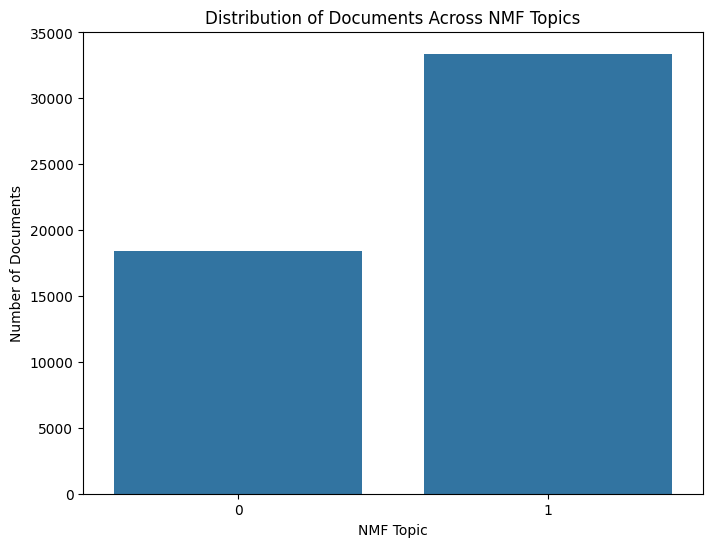

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Distribution of Documents Across NMF Topics')
plt.xlabel('NMF Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=0)
plt.show()

**Reasoning**:
To display representative documents for each NMF topic, I will filter the DataFrame `d` by each `topic_nmf` and then print a few `clean_titles` from the filtered results for each topic. This will allow for a qualitative understanding of the content within each topic.



In [ ]:
print("\nRepresentative documents for each NMF topic:")
for topic_id in sorted(d['topic_nmf'].unique()):
    print(f"\nTopic {topic_id}:")
    representative_docs = d[d['topic_nmf'] == topic_id]['clean_titles'].head(5)
    for i, doc in enumerate(representative_docs):
        print(f"  {i+1}. {doc}")


Representative documents for each NMF topic:

Topic 0:
  1. efficient hybrid transformer learning globallocal context urban sence segmentation
  2. semisupervised contrastive learning labelefficient medical image segmentation
  3. meal manifold embeddingbased active learning
  4. survey machine learning technique auto labeling video audio text data
  5. poissonseg semisupervised fewshot medical image segmentation via poisson learning

Topic 1:
  1. survey semantic stereo matching semantic depth estimation
  2. futureai guiding principle consensus recommendation trustworthy artificial intelligence future medical imaging
  3. enforcing mutual consistency hard region semisupervised medical image segmentation
  4. parameter decoupling strategy semisupervised 3d left atrium segmentation
  5. backgroundforeground segmentation interior sensing automotive industry


NMF with Sample Data and TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')

# Generate TFIDF matrix
tfidf_pos = tfidf_vectorizer.fit_transform(d['clean_titles'])

# Instantiate the NMF model
nmf_model_tfidf = NMF(n_components=num_topics_nmf, random_state=42)

# Fit the NMF model to the tfidf_pos matrix
document_topics_nmf_tfidf = nmf_model_tfidf.fit_transform(tfidf_pos)

# Determine the dominant topic for each document
d['topic_nmf_tfidf'] = document_topics_nmf_tfidf.argmax(axis=1)

# Display the head of the DataFrame to verify the topic assignment
print("\nDataFrame with assigned NMF TFIDF topics (first 5 rows):")
print(d[['clean_titles', 'topic_nmf_tfidf']].head())


DataFrame with assigned NMF TFIDF topics (first 5 rows):
                                        clean_titles  topic_nmf_tfidf
0  survey semantic stereo matching semantic depth...                0
1  futureai guiding principle consensus recommend...                1
2  enforcing mutual consistency hard region semis...                0
3  parameter decoupling strategy semisupervised 3...                0
4  backgroundforeground segmentation interior sen...                0


In [ ]:
print(f"\nTop {num_topics_nmf} words per topic for NMF with TFIDF:")
display_topics(nmf_model_tfidf, tfidf_vectorizer.get_feature_names_out(), num_topics_nmf)



Top 2 words per topic for NMF with TFIDF:

Topic 0:
network neural 

Topic 1:
learning reinforcement 


 NMF with Kaggle Data and TFIDF

In [ ]:
from sklearn.decomposition import NMF

# 2. Instantiate the NMF model
nmf_model_tfidf = NMF(n_components=num_topics_nmf, random_state=42)

# 3. Fit the NMF model to the tfidf_pos matrix
document_topics_nmf_tfidf = nmf_model_tfidf.fit_transform(tfidf_pos)

# 4. Determine the dominant topic for each document
d['topic_nmf_tfidf'] = document_topics_nmf_tfidf.argmax(axis=1)

# 6. Display the head of the DataFrame to verify the topic assignment
print("\nDataFrame with assigned NMF TFIDF topics (first 5 rows):")
print(d[['clean_titles', 'topic_nmf_tfidf']].head())


DataFrame with assigned NMF TFIDF topics (first 5 rows):
                                        clean_titles  topic_nmf_tfidf
0  survey semantic stereo matching semantic depth...                0
1  futureai guiding principle consensus recommend...                1
2  enforcing mutual consistency hard region semis...                0
3  parameter decoupling strategy semisupervised 3...                0
4  backgroundforeground segmentation interior sen...                0
